In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl as px
pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_excel("Hospital procedures Analysis.xlsx", sheet_name="procedures cleaned data")
df.head(47700)

,START,STOP,AM or PM procedure,Total Duration of procedure (Hours:Minutes),Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,0 days 03:32:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,No provided reason
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,0 days 00:17:03,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,No provided reason
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,0 days 00:15:00,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002.0,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,0 days 00:15:00,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006.0,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation)
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,0 days 03:44:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009.0,Renal dialysis (procedure),1255.0,NaN,No provided reason
...,...,...,...,...,...,...,...,...,...,...,...,...
47695,2022-01-29 12:12:53,2022-01-29 12:27:53,PM,0 days 00:15:00,Jaime666,20a4bc24-6b69-2f5c-dc74-1df390cae25b,07710480-9d6b-9c9b-87c3-c1d54df4069d,18286008.0,Catheter ablation of tissue of heart,10446.0,49436004.0,Atrial Fibrillation
47696,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006.0,Medication Reconciliation (procedure),413.0,NaN,No provided reason
47697,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006.0,Evaluation of uterine fundal height,3238.0,72892002.0,Normal pregnancy
47698,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009.0,Auscultation of the fetal heart,7045.0,72892002.0,Normal pregnancy


In [16]:
df = df.assign(
    duration_minutes = df['Total Duration of procedure (Hours:Minutes)'].apply(
        lambda x: int(x.total_seconds() / 60) if pd.notnull(x) else None
    )
)
df.head(47700)



,START,STOP,AM or PM procedure,Total Duration of procedure (Hours:Minutes),Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,duration_minutes
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,0 days 03:32:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,No provided reason,212
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,0 days 00:17:03,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,No provided reason,17
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,0 days 00:15:00,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002.0,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon,15
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,0 days 00:15:00,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006.0,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation),15
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,0 days 03:44:00,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009.0,Renal dialysis (procedure),1255.0,NaN,No provided reason,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47695,2022-01-29 12:12:53,2022-01-29 12:27:53,PM,0 days 00:15:00,Jaime666,20a4bc24-6b69-2f5c-dc74-1df390cae25b,07710480-9d6b-9c9b-87c3-c1d54df4069d,18286008.0,Catheter ablation of tissue of heart,10446.0,49436004.0,Atrial Fibrillation,15
47696,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006.0,Medication Reconciliation (procedure),413.0,NaN,No provided reason,15
47697,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006.0,Evaluation of uterine fundal height,3238.0,72892002.0,Normal pregnancy,15
47698,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,0 days 00:15:00,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009.0,Auscultation of the fetal heart,7045.0,72892002.0,Normal pregnancy,15


In [17]:
df = df.drop(columns = "Total Duration of procedure (Hours:Minutes)")
df.head(47000)

,START,STOP,AM or PM procedure,Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,duration_minutes
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,2.657640e+08,Renal dialysis (procedure),903.0,NaN,No provided reason,212
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,7.660100e+07,Intramuscular injection,2477.0,NaN,No provided reason,17
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,7.034230e+08,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon,15
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,1.731600e+08,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation),15
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,2.657640e+08,Renal dialysis (procedure),1255.0,NaN,No provided reason,224
...,...,...,...,...,...,...,...,...,...,...,...,...
46995,2021-11-17 12:02:10,2021-11-17 12:42:35,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,3d1d80fc-270b-eb74-0851-311d53602336,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,No provided reason,40
46996,2021-11-17 12:42:35,2021-11-17 13:04:48,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,7.108410e+08,Assessment of anxiety (procedure),431.0,NaN,No provided reason,22
46997,2021-11-17 13:04:48,2021-11-17 13:19:41,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,1.712070e+08,Depression screening (procedure),431.0,NaN,No provided reason,14
46998,2021-11-17 13:19:41,2021-11-17 13:48:58,PM,Trinidad33,a6edb3a5-9e0c-380d-b42e-6b98720ee617,19a9e447-1091-8994-f610-d708c83a0435,4.547110e+14,Depression screening using Patient Health Ques...,431.0,NaN,No provided reason,29


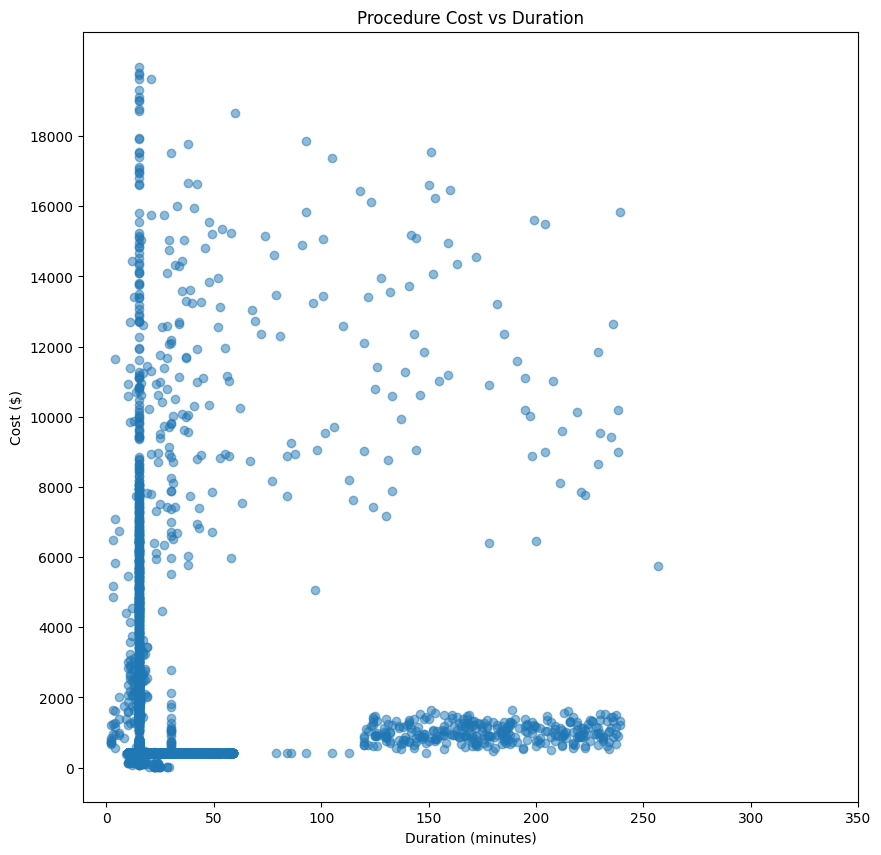

In [ ]:
#Relationship between procedure duration and procedure cost?

new_df = df[["BASE_COST", "duration_minutes"]].iloc[range(0, 5000)]
new_df = new_df[new_df['BASE_COST'] < 20000]
plt.figure(figsize=(10,10))
plt.scatter(new_df['duration_minutes'], new_df['BASE_COST'], alpha=0.5)

plt.xticks(ticks=range(0, 400, 50)) 
plt.yticks(ticks=range(0, 20000, 2000))  
plt.xlabel("Duration (minutes)")
plt.ylabel("Cost ($)")
plt.title("Procedure Cost vs Duration")
plt.show()

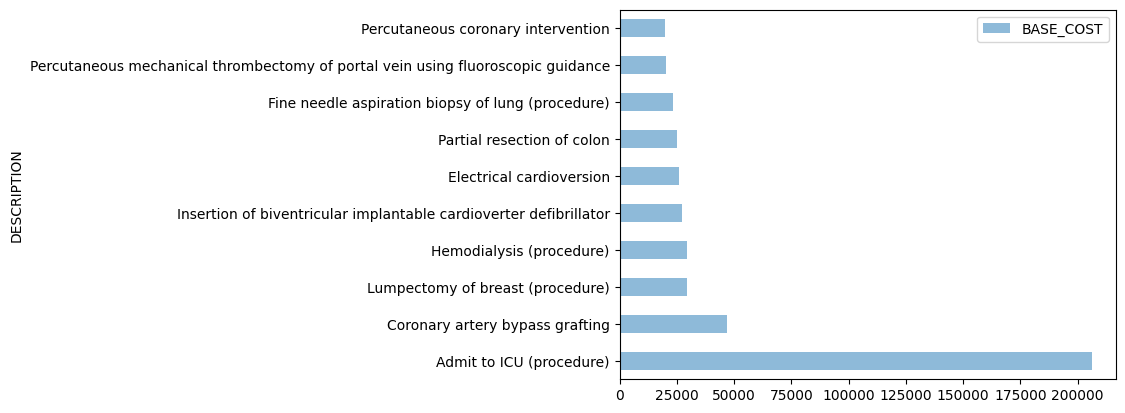

In [ ]:
#Avg cost per procedure (top 10)
df.head(47700)
procedure_df = df.groupby("DESCRIPTION")["BASE_COST"].mean().reset_index()
procedure_df = procedure_df.sort_values(by=["BASE_COST"], ascending = False)
finalized_df = procedure_df.iloc[range(10)]
finalized_df.head(47700)

finalized_df.plot(kind = "barh", y = "BASE_COST", x = "DESCRIPTION", alpha = 0.5);
#admission to ICU and surgeries tend to cost the most!

In [71]:
df.head(47700)

,START,STOP,AM or PM procedure,Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,duration_minutes
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,No provided reason,212
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,No provided reason,17
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002.0,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon,15
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006.0,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation),15
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009.0,Renal dialysis (procedure),1255.0,NaN,No provided reason,224
...,...,...,...,...,...,...,...,...,...,...,...,...
47695,2022-01-29 12:12:53,2022-01-29 12:27:53,PM,Jaime666,20a4bc24-6b69-2f5c-dc74-1df390cae25b,07710480-9d6b-9c9b-87c3-c1d54df4069d,18286008.0,Catheter ablation of tissue of heart,10446.0,49436004.0,Atrial Fibrillation,15
47696,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006.0,Medication Reconciliation (procedure),413.0,NaN,No provided reason,15
47697,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006.0,Evaluation of uterine fundal height,3238.0,72892002.0,Normal pregnancy,15
47698,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009.0,Auscultation of the fetal heart,7045.0,72892002.0,Normal pregnancy,15


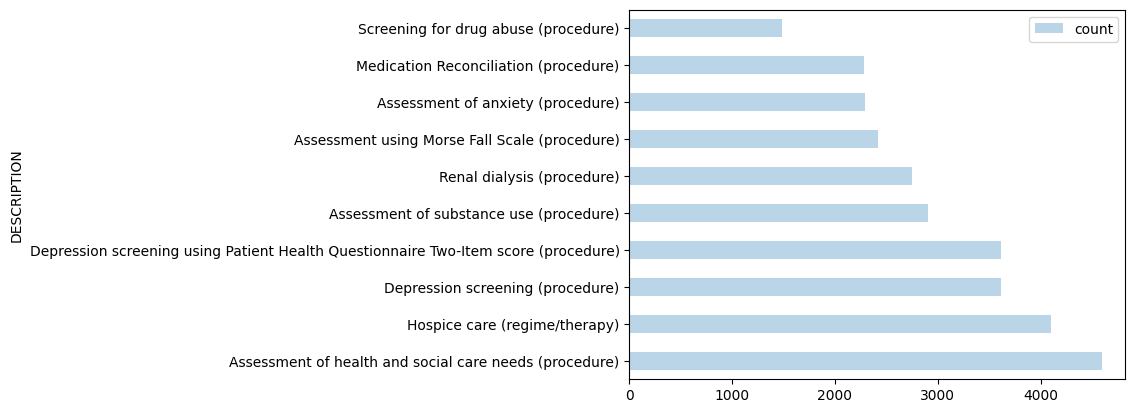

In [99]:
#most common procedure (top 10) 

procedure_10_df = df.groupby("DESCRIPTION").count().reset_index()
procedure_10_df = procedure_10_df.assign(count = procedure_10_df["START"])
procedure_10_df = procedure_10_df.drop(columns=["START", "STOP", "AM or PM procedure", "Patient Name", "PATIENT", "ENCOUNTER", "CODE", "BASE_COST", "REASONCODE", "REASONDESCRIPTION", "duration_minutes"])

procedure_10_sorted_df = procedure_10_df.sort_values(by = ["count"], ascending = False)
procedure_10_sorted_df = procedure_10_sorted_df.iloc[range(10)]
procedure_10_sorted_df.head(100)

procedure_10_sorted_df.plot(kind = "barh", y = "count", x = "DESCRIPTION", alpha = 0.3);





In [100]:
procedure_10_df.head(100)

,DESCRIPTION,count
0,Admission to burn unit,1
1,Admission to long stay hospital,1
2,Admission to orthopedic department,42
3,Admission to trauma surgery department,3
4,Admit to ICU (procedure),5
...,...,...
95,Medication Reconciliation (procedure),2284
96,Mental health screening (procedure),1
97,Methotrexate injection into tubal pregnancy,1
98,Microbial culture (procedure),1


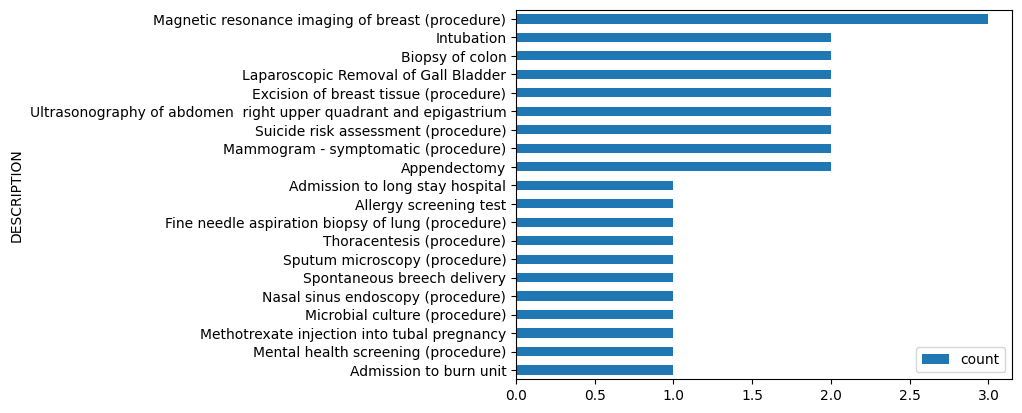

In [ ]:
#least common procedure (bottom 20) 
procedure_bottom_df = procedure_10_df.sort_values(by = ["count"], ascending = True)
procedure_bottom_df = procedure_bottom_df.iloc[range(20)]
procedure_bottom_df.head(1100)

procedure_bottom_df.plot(kind = "barh", x = "DESCRIPTION", y = "count");



In [108]:
df.head(47700)

,START,STOP,AM or PM procedure,Patient Name,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,duration_minutes
0,2011-01-02 01:26:36,2011-01-02 04:58:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,No provided reason,212
1,2011-01-02 21:44:39,2011-01-02 22:01:42,PM,Myrtis608,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,No provided reason,17
2,2011-01-04 06:49:55,2011-01-04 07:04:55,AM,Tyree261,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002.0,Combined chemotherapy and radiation therapy (p...,11620.0,363406005.0,Malignant tumor of colon,15
3,2011-01-04 20:02:09,2011-01-04 20:17:09,PM,Simon598,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006.0,Diagnostic fiberoptic bronchoscopy (procedure),9796.0,162573006.0,Suspected lung cancer (situation),15
4,2011-01-05 04:58:36,2011-01-05 08:42:36,AM,Mariano761,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009.0,Renal dialysis (procedure),1255.0,NaN,No provided reason,224
...,...,...,...,...,...,...,...,...,...,...,...,...
47695,2022-01-29 12:12:53,2022-01-29 12:27:53,PM,Jaime666,20a4bc24-6b69-2f5c-dc74-1df390cae25b,07710480-9d6b-9c9b-87c3-c1d54df4069d,18286008.0,Catheter ablation of tissue of heart,10446.0,49436004.0,Atrial Fibrillation,15
47696,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006.0,Medication Reconciliation (procedure),413.0,NaN,No provided reason,15
47697,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006.0,Evaluation of uterine fundal height,3238.0,72892002.0,Normal pregnancy,15
47698,2022-01-29 12:35:37,2022-01-29 12:50:37,PM,Candi549,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009.0,Auscultation of the fetal heart,7045.0,72892002.0,Normal pregnancy,15


,DESCRIPTION,duration_minutes
1,Admission to long stay hospital,23040.000000
70,Human epidermal growth factor receptor 2 gene ...,1928.571429
117,Prostatectomy,285.500000
71,Human epidermal growth factor receptor 2 gene ...,190.857143
124,Renal dialysis (procedure),178.867444
64,Hemodialysis (procedure),178.000000
145,Surgical manipulation of joint of knee,173.750000
18,Bilateral tubal ligation,145.416667
55,Excision of breast tissue (procedure),142.000000
3,Admission to trauma surgery department,135.000000


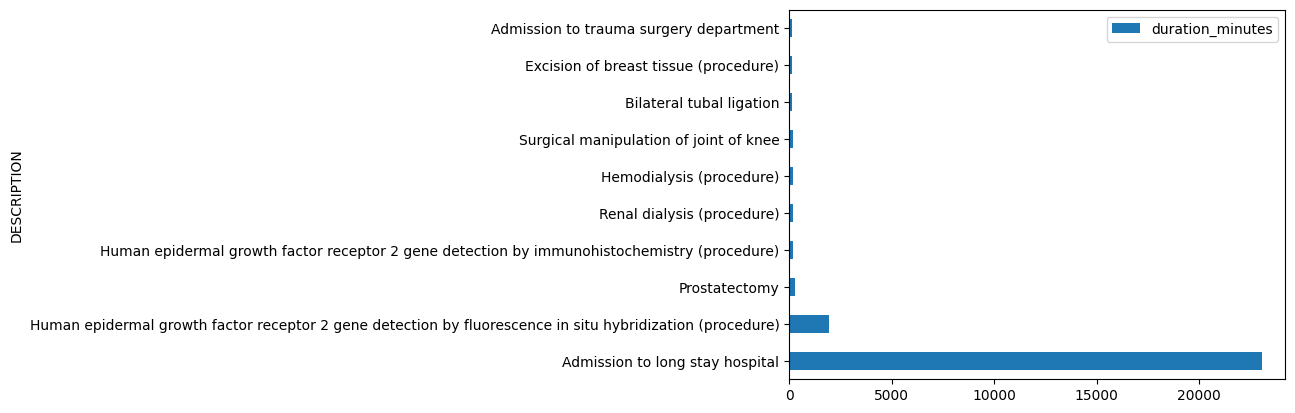

In [ ]:
#Top 10 Average procedure duration per specific type of procedure (e.g., colonoscopy or tumor removal) 

test_df = df.groupby(["DESCRIPTION"])["duration_minutes"].mean().reset_index()
test_df = test_df.sort_values(by= ["duration_minutes"], ascending = False)
test_df = test_df.iloc[range(10)]



test_df.plot(kind = "barh", y = "duration_minutes", x = "DESCRIPTION");
test_df.head(100)